In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import plotting
from pathlib import Path
import auxiliary
#from MCMC_affine_multi import run_MCMC as run
from MCMC_aux import get_model
import os
import scipy.interpolate as interp
import mass_calc as mc
import matplotlib
import Parameters as par
import Models as mod
import Kernels as ker
import GP_Likelihood as gp
from MCMC import run_MCMC as run
%matplotlib inline

2813.2308006313287 16620.585819951895


(0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0,

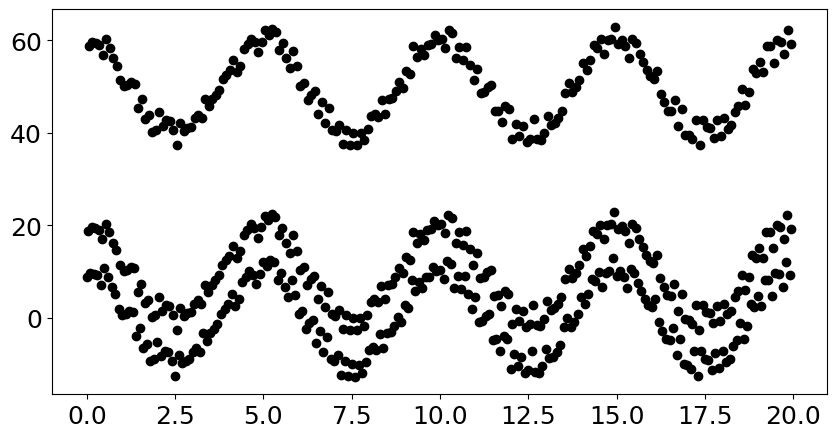

In [2]:
def ecc_anomaly(M, ecc, max_itr=200):
    '''
    ----------
    M : float
        Mean anomaly
    ecc : float
        Eccentricity, number between 0. and 0.99
    max_itr : integer, optional
        Number of maximum iteration in E computation. The default is 200.
    Returns
    -------
    E : float
        Eccentric anomaly
    '''
    
    E0 = M
    E = M
    #print("E before = ", E)
    for i in range(max_itr):
        f = E0 - ecc*np.sin(E0) - M
        fp = 1. - ecc*np.cos(E0)
        E = E0 - f/fp
        
        # check for convergence
        if (np.linalg.norm(E - E0, ord=1) <= 1.0e-10):
            return E
            break
        # if not convergence continue
        E0 = E
    
    # no convergence, return best estimate
    #print('Best estimate E = ',E[0:5])
    return E

time1 = np.arange(0., 20., 0.1)
A = 10.
P = 5
Aerr = []
Perr = []
Rerr = []
Keperr = []
for i in time1:
    Aerr.append(A+np.random.uniform(0,0))
    Perr.append(2*np.pi/(P+np.random.uniform(0,0)))
    Rerr.append(np.random.uniform(-3,3))
    Keperr.append(np.random.uniform(-3,3))
y1 = Aerr*np.cos(time1*(Perr))+Rerr
y1_err = np.ones_like(y1)*0.5
#time1_flag = np.ones_like(time1)

time2 = np.arange(0.05,20.05,0.1)
y2 = Aerr*np.cos(time2*(Perr))+Rerr+50
y2_err = np.ones_like(y2)*0.5
#time2_flag = np.zeros_like(time2)

time3 = np.arange(0.04,20.04,0.1)
y3 = Aerr*np.cos(time3*(Perr))+Rerr+10
y3_err = np.ones_like(y3)*0.5
#time3_flag = np.ones_like(time3)*2

#time = np.concatenate((time1, time2, time3))
#y = np.concatenate((y1, y2, y3))
#y_err = np.concatenate((y1_err, y2_err, y3_err))
#flags = np.concatenate((time1_flag, time2_flag, time3_flag))
#time, y, y_err, flags = zip(*sorted(zip(time, y, y_err, flags)))
#time = np.array(time)

time, y, y_err, flags = mod.get_data((time1,time2,time3), (y1,y2,y3), (y1_err,y1_err,y1_err))
print(flags)


fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(1,1,1)
ax.scatter(time,y, c="k")
plt.show()
#ax.plot(time, y ,c="r")

K = 20
ecc = 0.5
omega = np.pi/2.
Pl = 3.6
t0 = time[0]

M = 2*np.pi * (time-t0) / Pl
E = ecc_anomaly(M, ecc)
nu = 2. * np.arctan(np.sqrt((1.+ecc)/(1.-ecc)) * np.tan(E/2.))

Kep = K * (np.cos(omega + nu) + ecc*np.cos(omega))
y += Kep

K = 15
ecc = 0.7
omega = np.pi/4
Pl = 1.2
t0 = time[0]

M = 2*np.pi * (time-t0) / Pl
E = ecc_anomaly(M, ecc)
nu = 2. * np.arctan(np.sqrt((1.+ecc)/(1.-ecc)) * np.tan(E/2.))

#Kep2 = K * (np.cos(omega + nu) + ecc*np.cos(omega)) + Keperr

#fig = plt.figure(figsize = (10,5))
#ax = fig.add_subplot(1,1,1)
#ax.scatter(time,Kep, c="k")
#plt.show()

#fig = plt.figure(figsize = (10,5))
#ax = fig.add_subplot(1,1,1)
#ax.scatter(time,Kep2, c="k")
#plt.show()

#y = y+Kep+Kep2
#fig = plt.figure(figsize = (10,5))
#ax = fig.add_subplot(1,1,1)
#ax.scatter(time,y, c="k")
#plt.show()

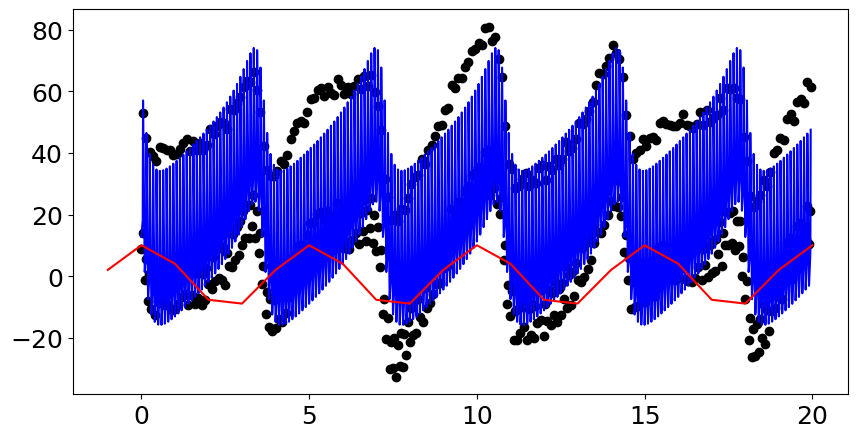

In [3]:
iterations = 100
numb_chains = 20
hparam = par.par_create("Cosine")
hparam["gp_amp"] = par.parameter(value = 10., error = 0.5, vary = True)
hparam["gp_per"] = par.parameter(value = 5., error = 0.5, vary = True)
prior_list = []
pri_amp = par.pri_create("gp_amp", "Uniform", [5.,15.])
prior_list.append(pri_amp)
pri_per = par.pri_create("gp_per", "Uniform", [0.,10.])
prior_list.append(pri_per)

model_list = ["Keplerian", "Offset", "Offset"]
model_par = mod.mod_create(model_list)

model_par["P_0"]=par.parameter(value=3.6, error=0.5, vary=True)
model_par["K_0"]=par.parameter(value=20., error=1., vary=True)
model_par["ecc_0"]=par.parameter(value=0.5, error=0.1, vary=True)
model_par["omega_0"]=par.parameter(value=1.13, error=0.05, vary=True)
model_par["t0_0"]=par.parameter(value=0., error=10., vary=True)
model_par["offset_0"] = par.parameter(50., 0.5, True) # applied to np.zeros + 1 (2nd item in get_data times list)
model_par["offset_1"] = par.parameter(10., 0.5, True) # applied ot np.zeros + 2 (3rd item in get_data times list)
model_y = get_model(model_list, time, model_par, to_ecc=False, flags=flags)

loglik = gp.GPLikelihood(time, y, y_err, hparam, "Cosine", model_y, model_par)
logL = loglik.LogL(prior_list)
xpred = np.arange(time1[0]-1., time1[-1]+1., 1)
GP_y, GP_err = loglik.predict(xpred)

plt.figure(figsize=(10,5))
plt.scatter(time,y, c="k")
plt.plot(time,model_y, c="b")
plt.plot(xpred,GP_y,c="r")

In [4]:
logL_chain, fin_hparams, fin_model_param, completed_iterations = run(iterations, time, y, y_err, hparam, "Cosine", model_par, model_list, prior_list, numb_chains=numb_chains, flags=flags)


Initial hyper-parameter guesses: 
[10.0, 5.0]

Initial model parameter guesses (ecc and omega are replaced by Sk and Ck): 
[3.6, 20.0, 0.6395159920975398, 0.3016940434471642, 0.0, 50.0, 10.0]

Initial Log Likelihood:  -36151.938455834286

Number of chains:  20

Start Iterations

Progress:  |██████████████████████████████████████████████████| 100.0% Complete


100 iterations have been completed with 20 contemporaneous chains

229 1791
Acceptance Rate =  0.11336633663366337
 ---- 1.0834513187408448 minutes ----


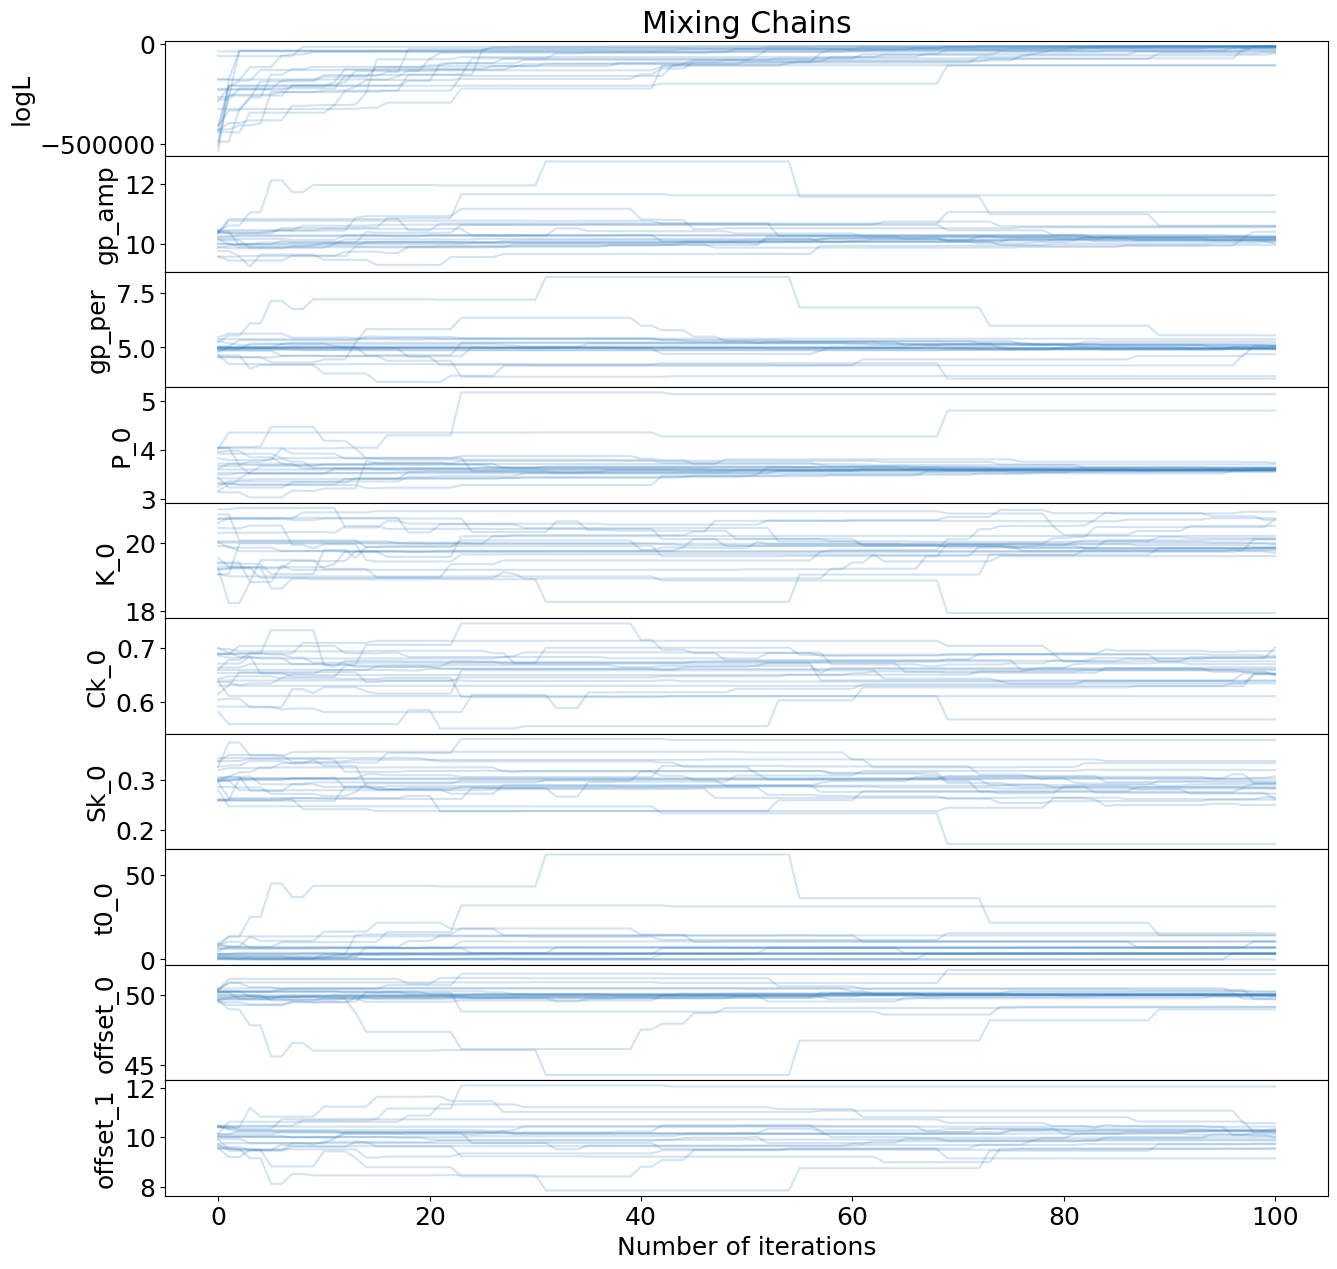

In [5]:
plotting.mixing_plot(iterations, numb_chains, fin_hparams, "Cosine", fin_model_param, model_list, logL_chain)

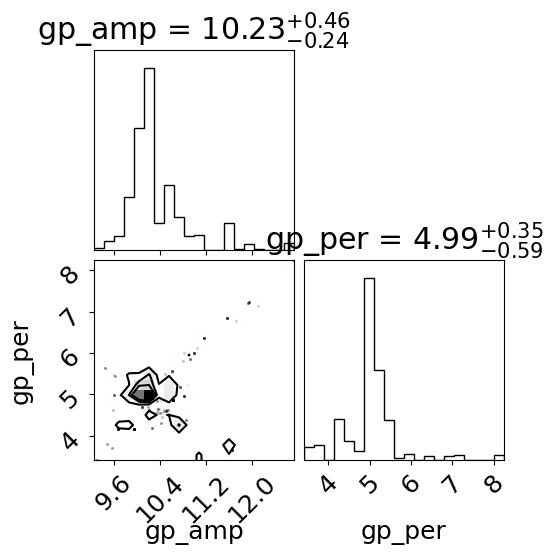

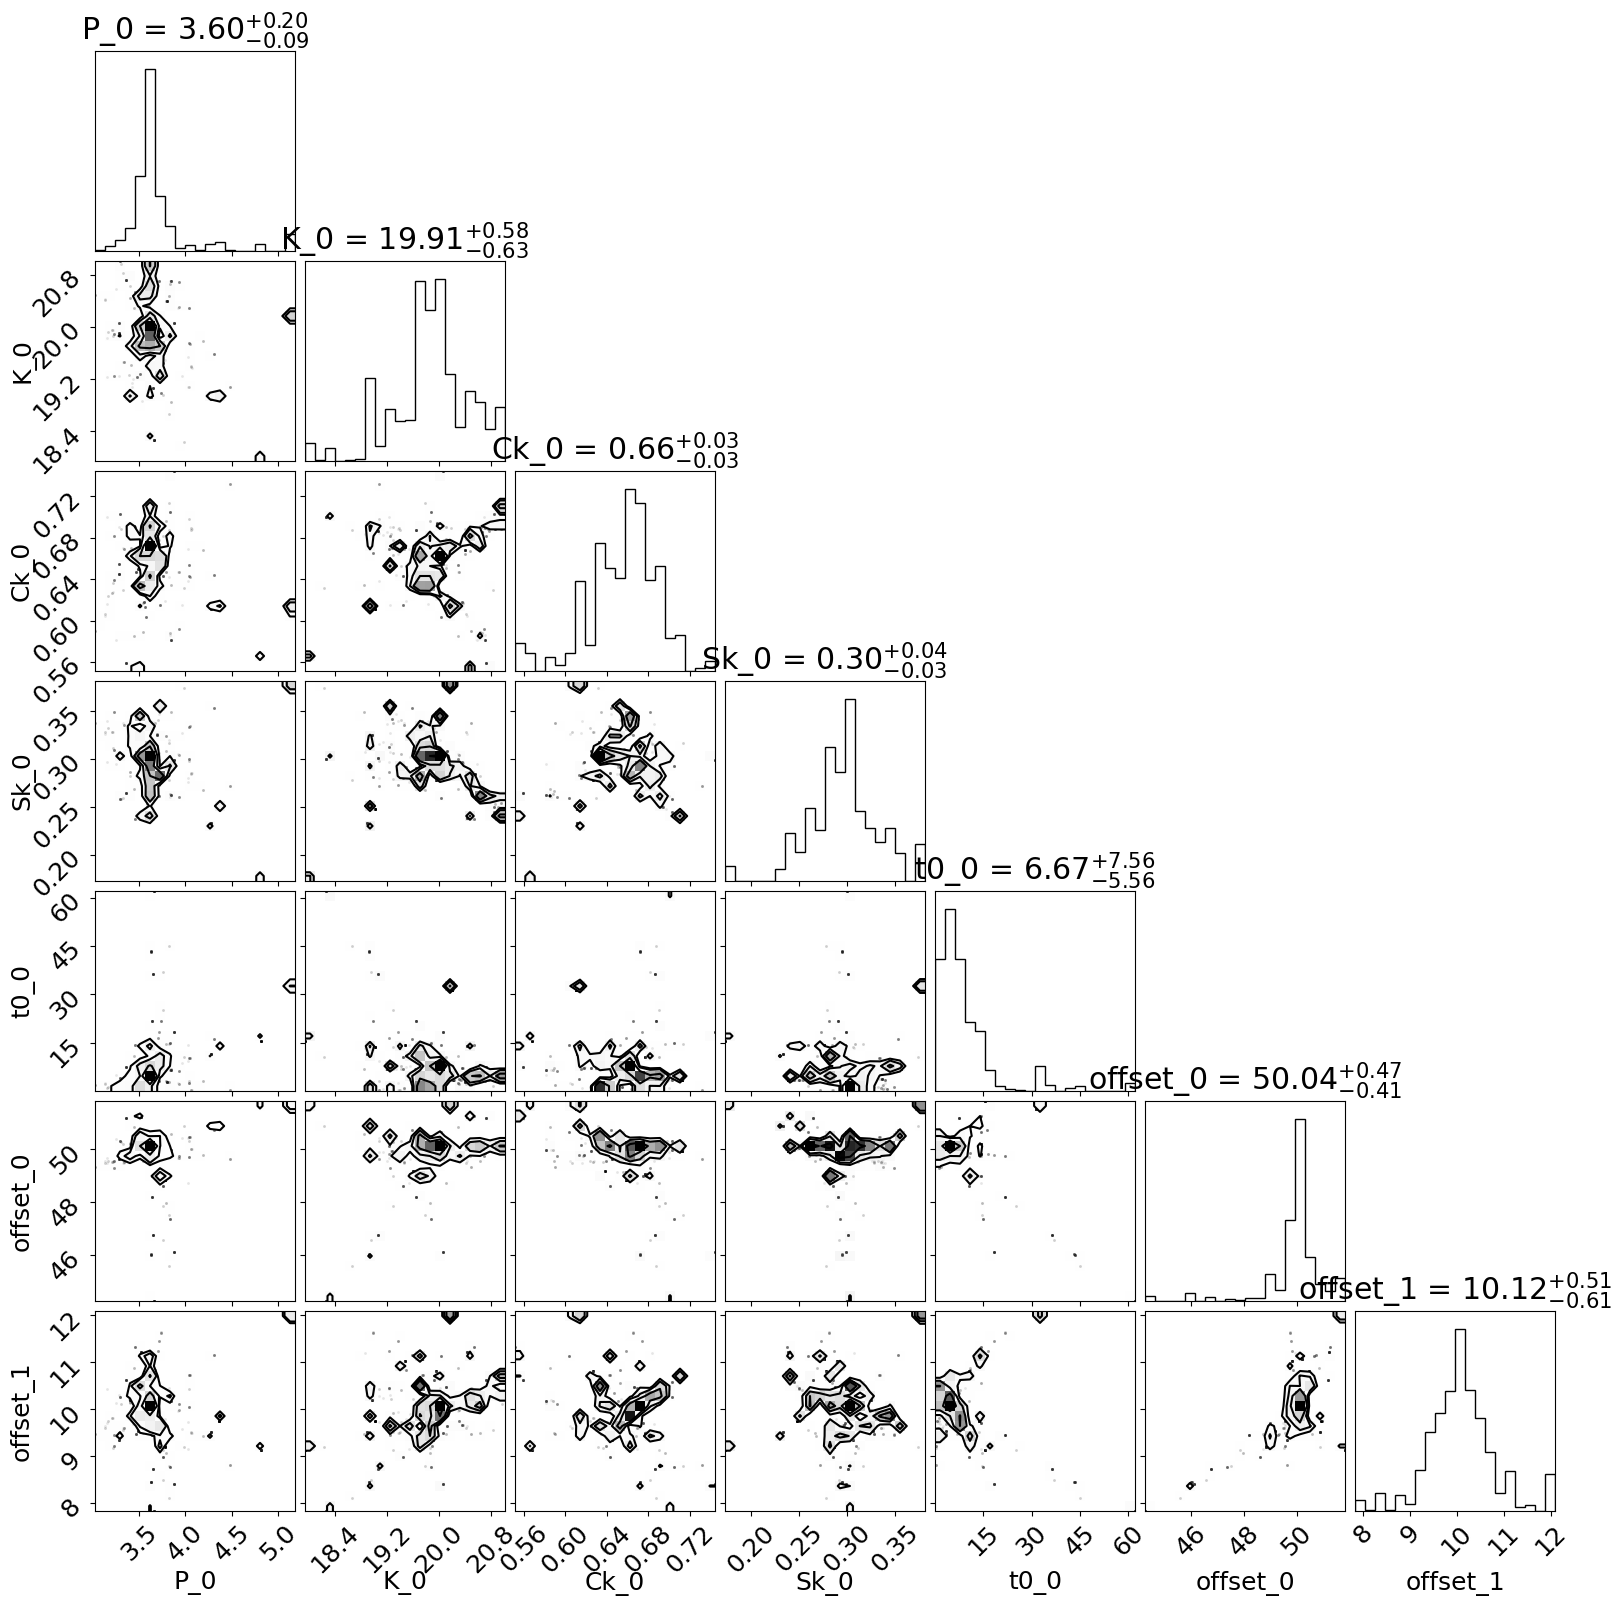

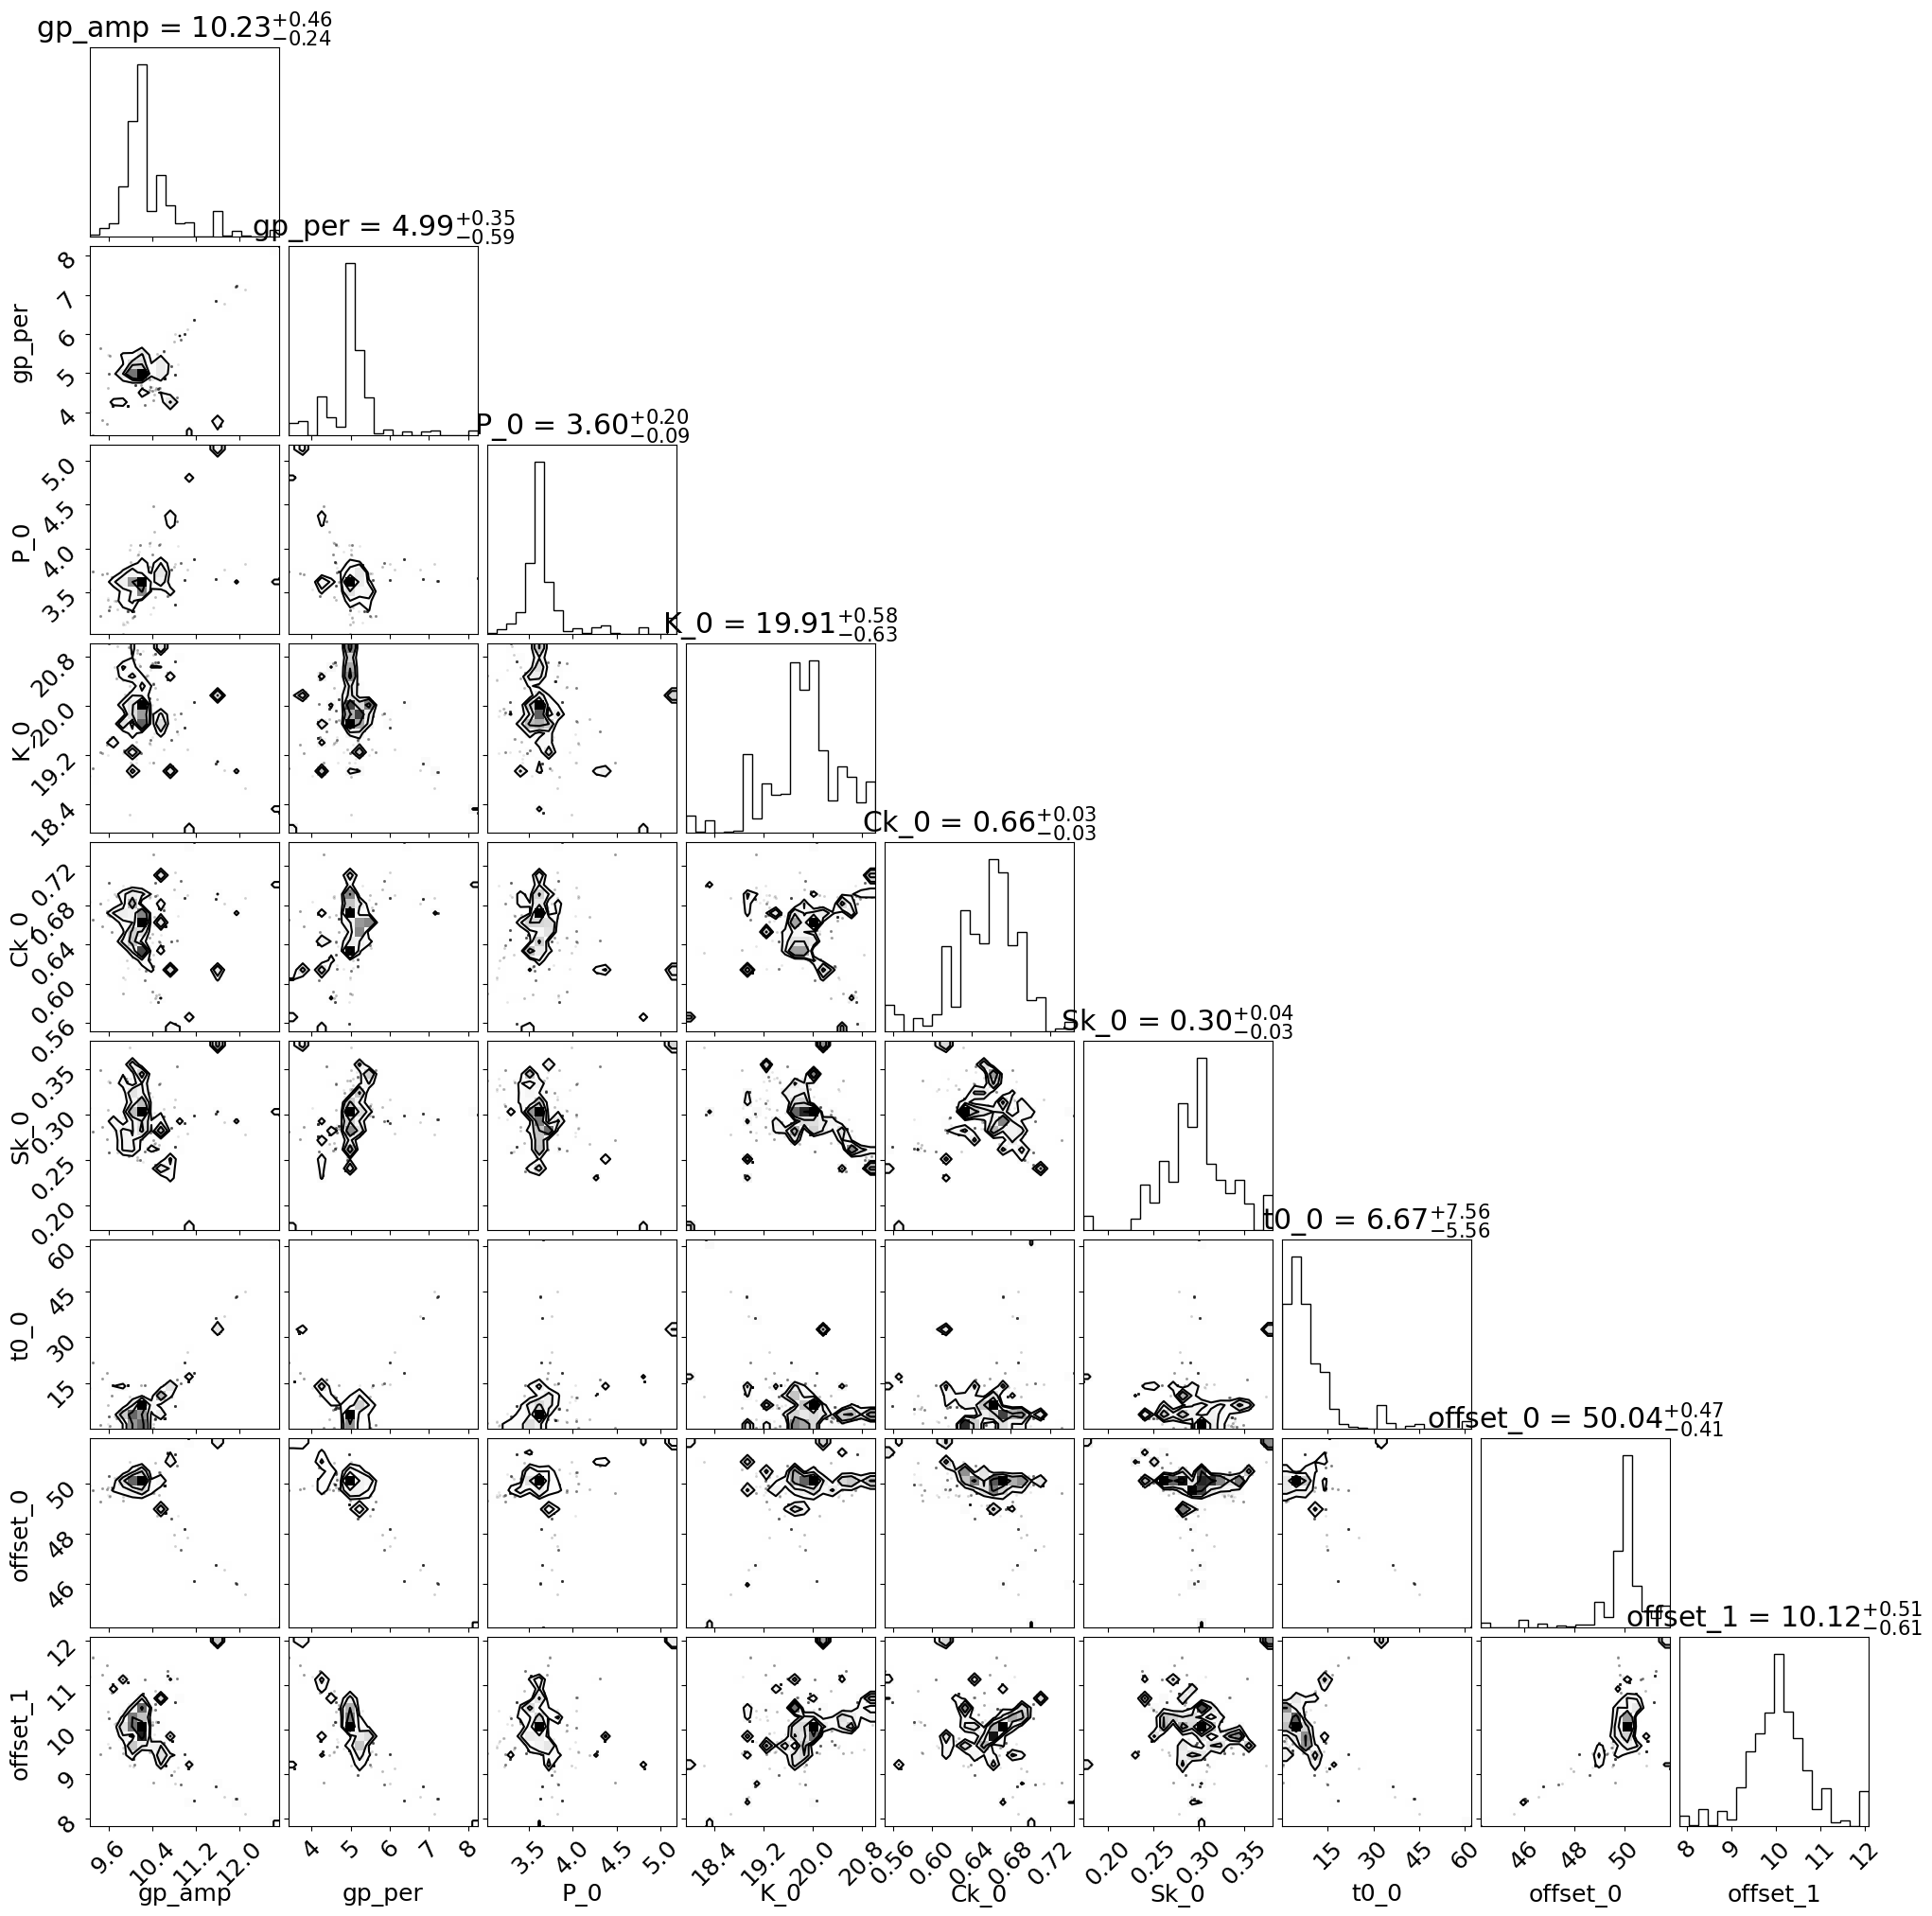

Parameter values after MCMC:  [10.225875233361949, 4.988935900479838, 3.604562757650979, 19.907396446184315, 0.659037780457222, 0.29749160297954375, 6.669300352813375, 50.03681059638593, 10.1228366756918]


In [6]:
final_param_values, final_param_erru, final_param_errd = plotting.corner_plot(fin_hparams, "Cosine", fin_model_param, model_list, errors=True)